# **Decision Tree Classifier Model**

Requirements:
* Use this dataset for your assignment today.
* Create a Decision Tree Classifier model on your training data.
* Report the precision, recall, and accuracy of your training and test sets.
* Try some of the preprocessing techniques learned previously where applicable to improve your model.
* Plot your Decision Tree at the end of your notebook showing the tree you created.
* Submit your notebook to the Learn platform when finished.

**import required libraries**

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder

In [194]:
animalsdf = pd.read_csv('/content/dog_horse.csv')
animalsdf.head()

,id,height,weight,target,type
0,0,27,71,0,dog
1,1,27,92,0,dog
2,2,32,47,0,dog
3,3,30,90,0,dog
4,4,28,91,0,dog


**I make the copy of the dataset because i want try to do Decision Tree Classifier with and without "type" column due to the result i reach to it.**

In [195]:
animalsdf_copy = animalsdf.copy()
animalsdf_copy.head()

,id,height,weight,target,type
0,0,27,71,0,dog
1,1,27,92,0,dog
2,2,32,47,0,dog
3,3,30,90,0,dog
4,4,28,91,0,dog


In [196]:
animalsdf.shape

(200, 5)

In [197]:
animalsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   height  200 non-null    int64 
 2   weight  200 non-null    int64 
 3   target  200 non-null    int64 
 4   type    200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [198]:
# Number of Unique values in each columns.
animalsdf.nunique()

id        200
height     58
weight    110
target      2
type        2
dtype: int64

In [199]:
animalsdf.describe()

,id,height,weight,target
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,47.480000,106.830000,0.500000
std,57.879185,18.415353,38.636836,0.501255
min,0.000000,25.000000,40.000000,0.000000
25%,49.750000,32.000000,80.000000,0.000000
50%,99.500000,43.000000,99.000000,0.500000
75%,149.250000,62.250000,141.000000,1.000000
max,199.000000,84.000000,179.000000,1.000000


In [200]:
# check out the null value
animalsdf.isnull().sum()

id        0
height    0
weight    0
target    0
type      0
dtype: int64

# **EDA**

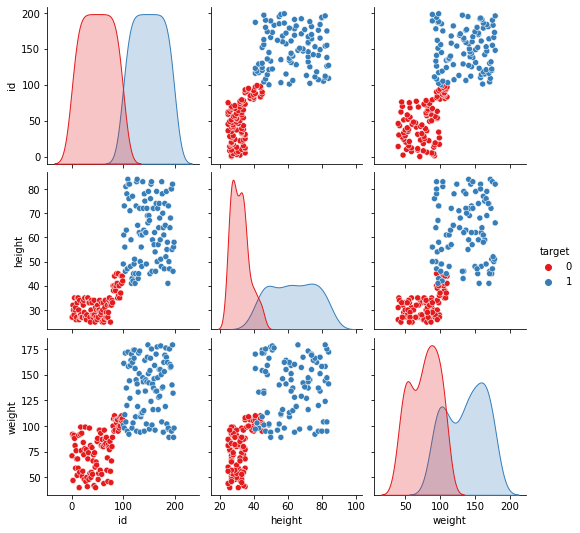

In [201]:
sns.pairplot(animalsdf,hue='target',palette='Set1')

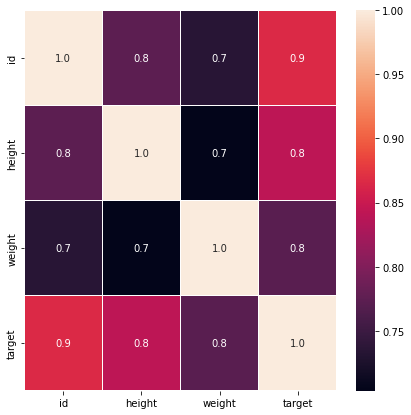

In [202]:
#heatmap for dataset
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(animalsdf.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# **Try again!!**

because of the result below that is not make sense
i will try to drop the ['type'] column from the x **bold text**

In [203]:
xx = animalsdf_copy[["weight","height"]]
yy = animalsdf_copy['target']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.20)

In [205]:
animalsdf_copy = DecisionTreeClassifier()

In [206]:
animalsdf_copy.fit(X_train,y_train)

DecisionTreeClassifier()

In [207]:
predictions = animalsdf_copy.predict(X_test)

In [208]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        22

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [209]:
print(confusion_matrix(y_test,predictions))

[[17  1]
 [ 1 21]]


**Well, it's kind of a logical result.....**

**Model Using Entropy**

In [210]:
# Set max depth to 3 to make plotting the tree more visible

animalsdf_copy = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(xx, yy)


In [211]:
#we can calculate the accuarcy using score
score = animalsdf_copy.score(xx,yy)
print(score)

0.98


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


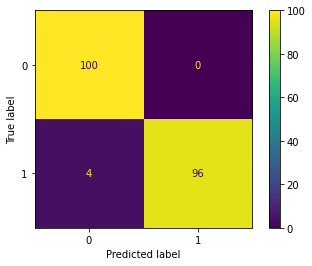

In [212]:
#we can also make a simple confusion matrix
plot_confusion_matrix(animalsdf_copy, xx, yy);

In [213]:
animalsdf_copy.classes_

array([0, 1])

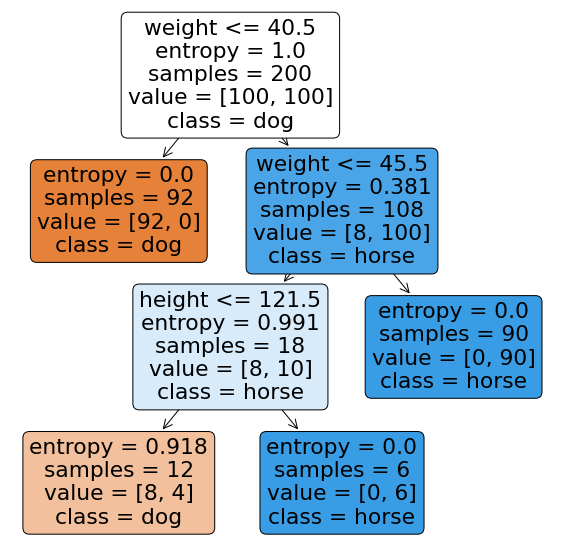

In [214]:
# Plot the tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    animalsdf_copy, 
    filled=True,
    rounded=True,
    feature_names=['height','weight','type_dog','type_horse'], # columns in same order as was trained on
    class_names=['dog','horse'] # use cl2.classes_ to find class order
);

 **Model Using Gini**

In [215]:
# Set max depth to 3 to make plotting the tree more visible
animalsdf_copy = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(xx, yy)

In [216]:
#we can calculate the accuarcy using score
score = animalsdf_copy.score(xx,yy)
print(score)

0.98


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


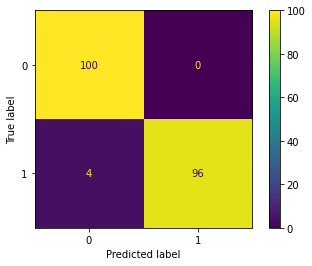

In [217]:
#we can also make a simple confusion matrix
plot_confusion_matrix(animalsdf_copy, xx, yy);

In [218]:
[str(x) for x in animalsdf_copy.classes_]

['0', '1']

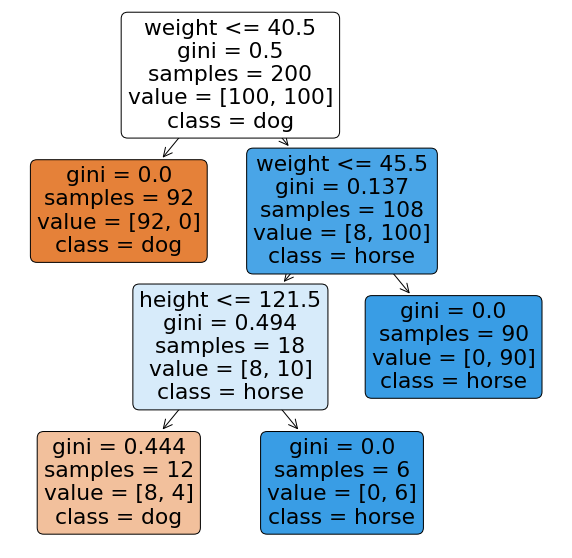

In [219]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(
    animalsdf_copy, 
    filled=True,
    rounded=True,
    feature_names=['height','weight','type'], # columns in same order as was trained on
    class_names=['dog','horse'] # use cl2.classes_ to find class order
);

# **Feature Engineering**

**One Hot Encoder**

In [220]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["type"]

# One Hot encode the column data sets
one_hot_animalsdf = one_hot.fit_transform(animalsdf[col_names]).toarray()

In [221]:
# Look at the categories
one_hot.categories_

[array(['dog', 'horse'], dtype=object)]

In [222]:
one_hot_animalsdf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [223]:
one_hot.categories_[0]

array(['dog', 'horse'], dtype=object)

In [224]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['type_dog', 'type_horse']

In [225]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["type"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [226]:
one_hot_animalsdf.shape

(200, 2)

In [227]:
one_hot_animalsdf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [228]:
# Cast One Hot Encoded values into a dataframe

ohe_animalsdf = pd.DataFrame(
    one_hot_animalsdf,
    index=animalsdf.index,
    columns = column_names
)

print(ohe_animalsdf.shape)

(200, 2)


In [229]:
ohe_animalsdf.head()

,type_dog,type_horse
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [230]:
merged = pd.concat([animalsdf,ohe_animalsdf],axis='columns')
print(merged.shape)

(200, 7)


In [231]:
merged.head()

,id,height,weight,target,type,type_dog,type_horse
0,0,27,71,0,dog,1.0,0.0
1,1,27,92,0,dog,1.0,0.0
2,2,32,47,0,dog,1.0,0.0
3,3,30,90,0,dog,1.0,0.0
4,4,28,91,0,dog,1.0,0.0


In [232]:
animalsdf_new = merged.drop(["type"], axis='columns')
animalsdf_new

,id,height,weight,target,type_dog,type_horse
0,0,27,71,0,1.0,0.0
1,1,27,92,0,1.0,0.0
2,2,32,47,0,1.0,0.0
3,3,30,90,0,1.0,0.0
4,4,28,91,0,1.0,0.0
...,...,...,...,...,...,...
195,195,55,140,1,0.0,1.0
196,196,82,179,1,0.0,1.0
197,197,46,132,1,0.0,1.0
198,198,56,89,1,0.0,1.0


# **Train Test Split**

**Split the data into a training set and a test set**

In [233]:
x = animalsdf_new[['height','weight','type_dog','type_horse']]
y = animalsdf_new['target']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# **Decision Trees**

**Training decision tree**

In [235]:
animalsdf_new = DecisionTreeClassifier()

In [236]:
animalsdf_new.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction and Evaluation**

In [237]:
predictions = animalsdf_new.predict(X_test)

In [238]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [239]:
print(confusion_matrix(y_test,predictions))

[[31  0]
 [ 0 29]]


# *Model Using Entropy*

In [240]:
# Set max depth to 3 to make plotting the tree more visible

animalsdf_new = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x, y)


In [241]:
#we can calculate the accuarcy using score
score = animalsdf_new.score(x,y)
print(score)

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


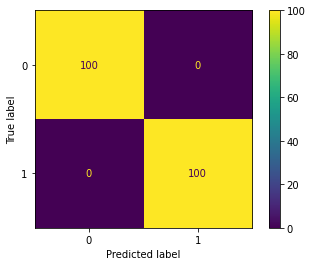

In [242]:
#we can also make a simple confusion matrix
plot_confusion_matrix(animalsdf_new, x, y);

In [243]:
animalsdf_new.classes_

array([0, 1])

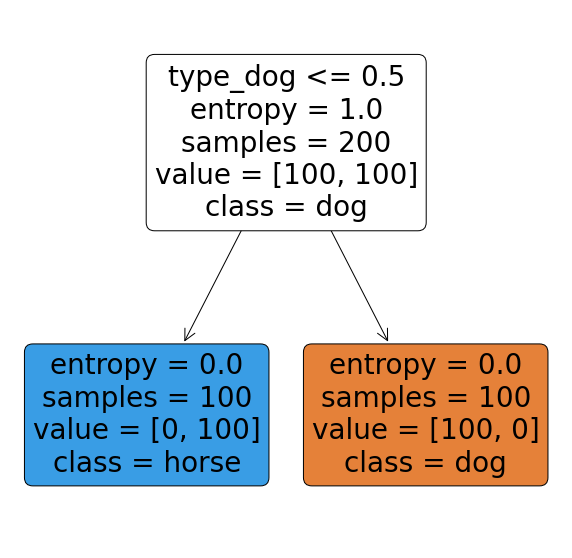

In [244]:
# Plot the tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    animalsdf_new, 
    filled=True,
    rounded=True,
    feature_names=['height','weight','type_dog','type_horse'], # columns in same order as was trained on
    class_names=['dog','horse'] # use cl2.classes_ to find class order
);

# *Model Using Gini*

In [245]:
# Set max depth to 3 to make plotting the tree more visible
animalsdf_new = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(x, y)

In [246]:
#we can calculate the accuarcy using score
score = animalsdf_new.score(x,y)
print(score)

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


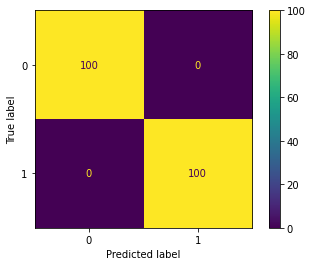

In [247]:
#we can also make a simple confusion matrix
plot_confusion_matrix(animalsdf_new, x, y);

In [248]:
[str(x) for x in animalsdf_new.classes_]

['0', '1']

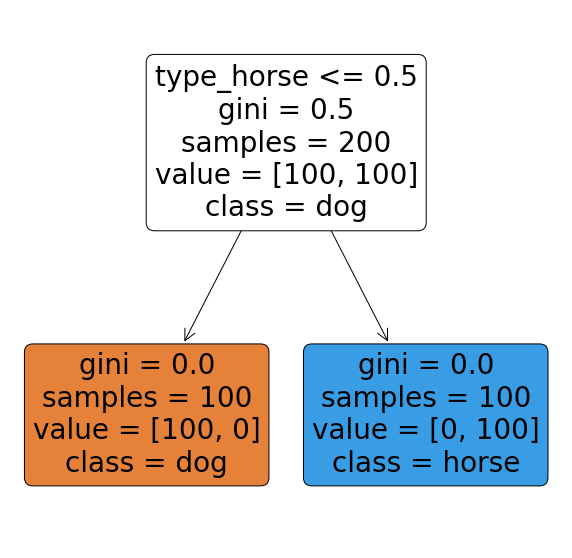

In [249]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(
    animalsdf_new, 
    filled=True,
    rounded=True,
    feature_names=['height','weight','type_dog','type_horse'], # columns in same order as was trained on
    class_names=['dog','horse'] # use cl2.classes_ to find class order
);